## HW1. NumPy and Matplotlib
### 2022313047 Boyeon,Kim 

In [1]:
# Library
import numpy as np
import matplotlib.pyplot as plt

### 1. (Matrix Arithmetic)

Let consider a matrix $A$ and a vector $b$,  
$$ 
A = 
\begin{bmatrix}
1 & 1 & -2 \\
3 & 3 & -5 \\
3 & 2 & -10 \\
1 & 1 & -7 \\
-4 & -4 & 11 
\end{bmatrix} ,
b =
\begin{bmatrix}
2 & 7 & 2 & -3 & -4 
\end{bmatrix}
$$

#### (1) Generate arrays for A matrix and b vector using NumPy library

In [2]:
A = np.array([[1, 1, -2],[3, 3, -5],[3, 2, -10], [1,1,-7], [-4,-4,11]])
b = np.array([2, 7, 2, -3, -4])

print('\n','1. A is')
print(A)

print('\n','2. b is')
print(b)



 1. A is
[[  1   1  -2]
 [  3   3  -5]
 [  3   2 -10]
 [  1   1  -7]
 [ -4  -4  11]]

 2. b is
[ 2  7  2 -3 -4]


#### (2) Transpose A and apply matrix multiplication with the original matrix($A^TA$)

In [3]:
transA = A.T
print('\n','1. Transpose A is')
print(transA)

ATA = np.dot(transA,A)
print('\n','2. Trans(A) * A is')
print(ATA)


 1. Transpose A is
[[  1   3   3   1  -4]
 [  1   3   2   1  -4]
 [ -2  -5 -10  -7  11]]

 2. Trans(A) * A is
[[ 36  33 -98]
 [ 33  31 -88]
 [-98 -88 299]]


#### (3) Calculate x as the solution of $A^TAx = A^Tb$

$$
x = (A^TA)^{-1}A^Tb 
$$

In [4]:
ATAinv = np.linalg.inv(ATA)
print('\n','1. inverse(trans(A)*A) is')
print(ATAinv)

B = np.dot(transA,b)
print('\n','2. trans(A)*b is')
print(B)

x = np.dot(ATAinv,B)
print('\n','3. the solution x is')
print(x)



 1. inverse(trans(A)*A) is
[[ 2.03604806 -1.65954606  0.17890521]
 [-1.65954606  1.54873164 -0.08811749]
 [ 0.17890521 -0.08811749  0.03604806]]

 2. trans(A)*b is
[ 42  40 -82]

 3. the solution x is
[ 4.46194927 -0.52603471  1.03337784]


#### (4) Calculate the norm of Ax −b with line-by-line coding and using NumPy library.

Let $X = Ax - b$,  
$$
L_p = (\Sigma_{i}^{n}|X(i)|^{p})^{1/p}
$$

In [5]:
print('\n 1. Line-by-Line coding')
diff_mat = np.dot(A, x) - b
print(' (1) Ax - b is')
print( diff_mat)

# L1 norm
norm1 = sum(abs(diff_mat))
print('\n (2)-1. 1-norm :', norm1)

# L2 norm
normsq = np.dot(diff_mat, diff_mat)
print(' (2)-2. (Ax - b)*(Ax - b) = ', normsq)
norm2 = np.sqrt(normsq)
print('         2-norm :', norm2)

# infinity-norm
norminf = abs(max(diff_mat))
print(' (2)-3. infinity-norm :', norminf)

# Using Numpy Library
print('\n 2. Using numpy norm')
norm1_ = np.linalg.norm(diff_mat,1)
norm2_ = np.linalg.norm(diff_mat,2)
norminf_ = np.linalg.norm(diff_mat,np.inf)

print(' (1) 1-norm is',norm1_)
print(' (2) 2-norm is',norm2_)
print(' (3) infinity-norm is',norminf)


 1. Line-by-Line coding
 (1) Ax - b is
[-1.30841121e-01 -3.59145527e-01  3.55271368e-14 -2.97730307e-01
 -3.76502003e-01]

 (2)-1. 1-norm : 1.16421895861152
 (2)-2. (Ax - b)*(Ax - b) =  0.37650200267022654
         2-norm : 0.6135975901763521
 (2)-3. infinity-norm : 3.552713678800501e-14

 2. Using numpy norm
 (1) 1-norm is 1.16421895861152
 (2) 2-norm is 0.6135975901763521
 (3) infinity-norm is 3.552713678800501e-14


### 2. (Drawing Graps)

A two-dimensional Ackley function, $f(x,y)$, has many local minima and one global minimum
in the domain,$(x,y) ∈[−4,4] ×[−4,4]$.  
$$
f(x,y) = −a \exp{(−b\sqrt{0.5(x^2+ y^2)})} −\exp{(0.5(cos(cx) + cos(cy)))} + a + \exp(1)
$$  
where $a = 20, b = 0.2,$ and $c = 2π$.

#### (1) Plot a 2D contour of the Ackley function on $(x,y) ∈[−4,4] ×[−4,4]$.

In [6]:
# Setting the function
def Ackley(x, y):
    a = 20
    b = 0.2
    c = 2*np.pi
    f1 = -a * np.exp(-b * np.sqrt(0.5 * (x**2 + y**2)))
    f2 = np.exp(0.5 * np.cos(c*x) + np.cos(c*y))
    f = f1 - f2 + a + np.exp(1)
    return f

In [7]:
lb = -4
ub = 4
N  = 1001

x = np.linspace(lb,ub,N)
y = np.linspace(lb,ub,N)
X, Y = np.meshgrid(x, y)
Z = Ackley(X, Y)

In [8]:
# Set plot params
plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['ytick.major.size'] = 7
plt.rcParams['xtick.minor.size'] = 3.5
plt.rcParams['ytick.minor.size'] = 3.5
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.width'] = 1.5
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

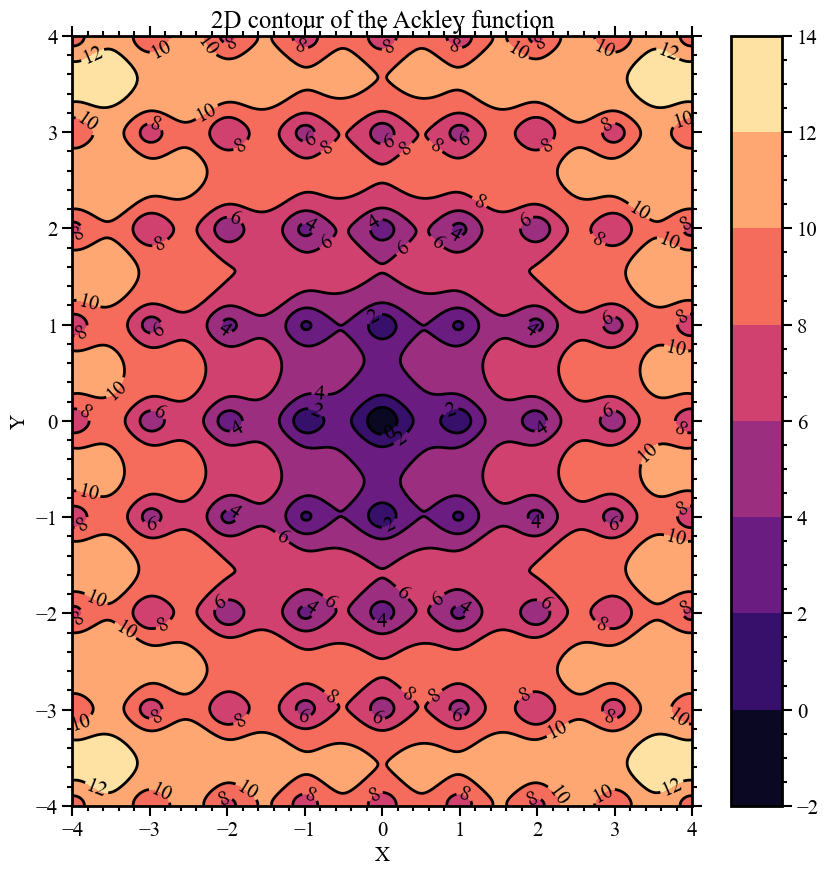

In [9]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure()
cont = plt.contourf(X,Y,Z, cmap='magma')
plt.xlabel('X')
plt.ylabel('Y')
cs=plt.contour(X,Y,Z,colors='k')
# 등고선 표현
plt.clabel(cs)
plt.title('2D contour of the Ackley function')
fig.colorbar(cont, shrink=1, aspect=15)

#### (2) Plot a 3D graph of the Ackley function on $(x,y) ∈[−4,4] ×[−4,4]$.

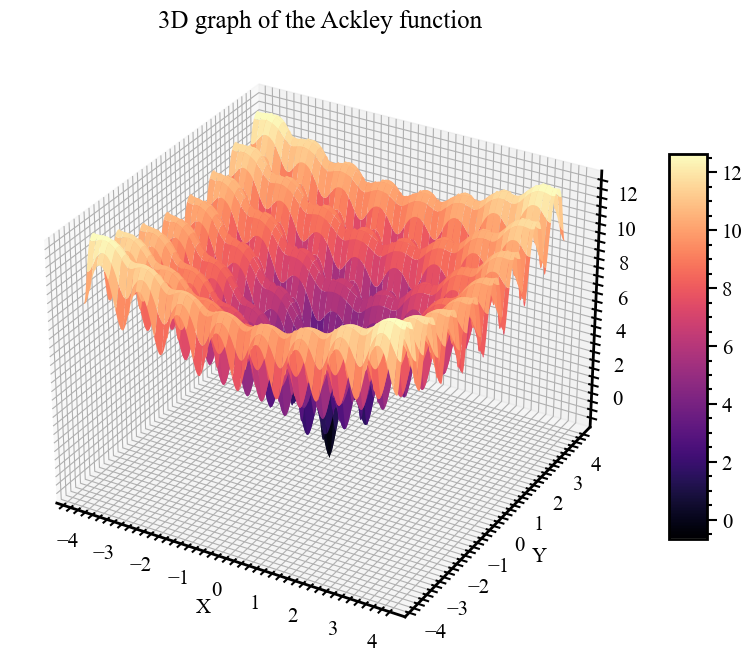

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig= plt.figure()
ax=fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(X,Y,Z, cmap='magma')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('3D graph of the Ackley function')
fig.colorbar(surf, shrink=0.5, aspect=10)

#### (3) Find the global minimum and its position.

In [11]:
global_min = np.min(Z)
# numpy.unravel_index(indices[], shape()) : indices를 shape에 매핑시킨 index 반환
min_index = np.unravel_index(np.argmin(Z), Z.shape)

print(' 1. Global minimum = ', global_min)
# Cartesian 과 Matrix는 반대로 indexing 됨
# 따라서, x와 y의 indexing 반대임
print(' 2. The position (x,y) =', (x[min_index[1]], y[min_index[0]]))


 1. Global minimum =  -1.7634072418790185
 2. The position (x,y) = (0.0, 0.0)


In [12]:
# additional 실험
""" if n = 1000이라면, (0,0)을 찍지 못해서 min이 다르게 구해짐 """
lb_add = -4
ub_add = 4
N_add  = 1000

x_add = np.linspace(lb,ub,N_add)
y_add = np.linspace(lb,ub,N_add)
X_add, Y_add = np.meshgrid(x_add, y_add)
Z_add = Ackley(X_add, Y_add)

global_min_add = np.min(Z_add)
# numpy.unravel_index(indices[], shape()) : indices를 shape에 매핑시킨 index 반환
min_index_add = np.unravel_index(np.argmin(Z_add), Z_add.shape)
print('\n Additional Experiment')
print(' add1. Global minimum = ', global_min_add)
# Cartesian 과 Matrix는 반대로 indexing 됨
# 따라서, x와 y의 indexing 반대임
print(' add2. The position (x,y) =', (x[min_index_add[1]], y[min_index_add[0]]))


 Additional Experiment
 add1. Global minimum =  -1.7452708413626357
 add2. The position (x,y) = (-0.008000000000000007, -0.008000000000000007)


#### (4) Plot a graph for $f(y|x = −2), f(y|x = 0)$, and $f(y|x = 2)$ in one plot with legends.

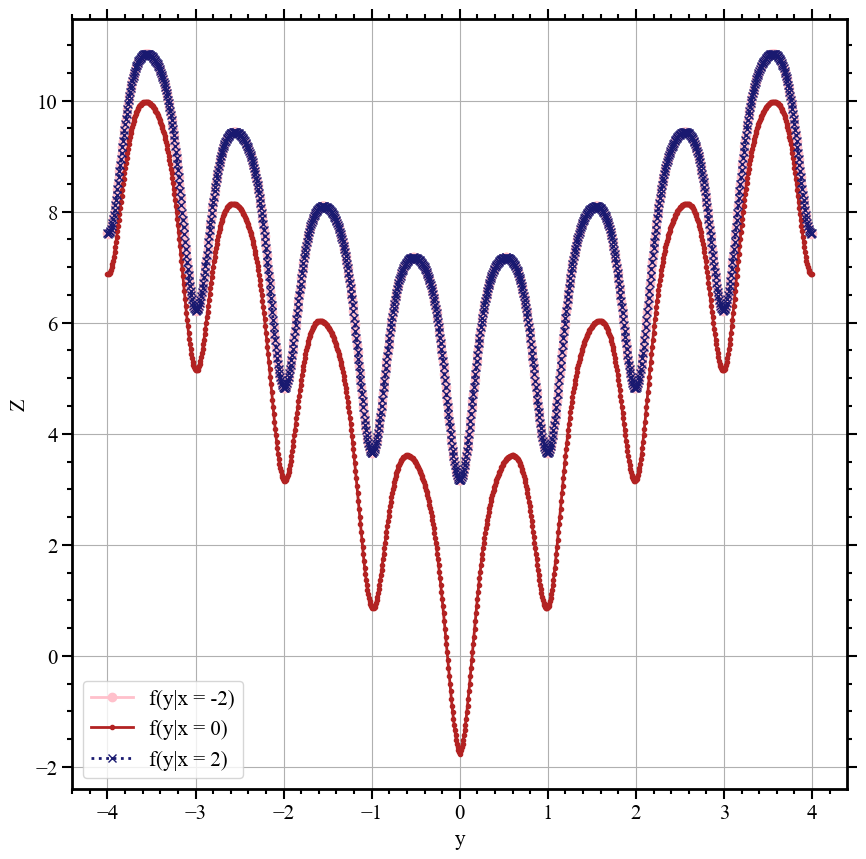

In [13]:
x_values = [-2, 0, 2]
colors = ['pink', 'firebrick', 'midnightblue']
shapes = ['o-','.-','x:']

fig, ax = plt.subplots()
for x_value, color, shapes in zip(x_values, colors, shapes):
    ax.plot(y, Ackley(x_value, y), shapes, color=color, label=f'f(y|x = {x_value})')

plt.xlabel('y')
plt.ylabel('Z')
ax.legend()
plt.grid()   



#### (5) Plot the x-direction averaged one-dimensional graph and the y-direction averaged one-dimensional graph on the same canvas.

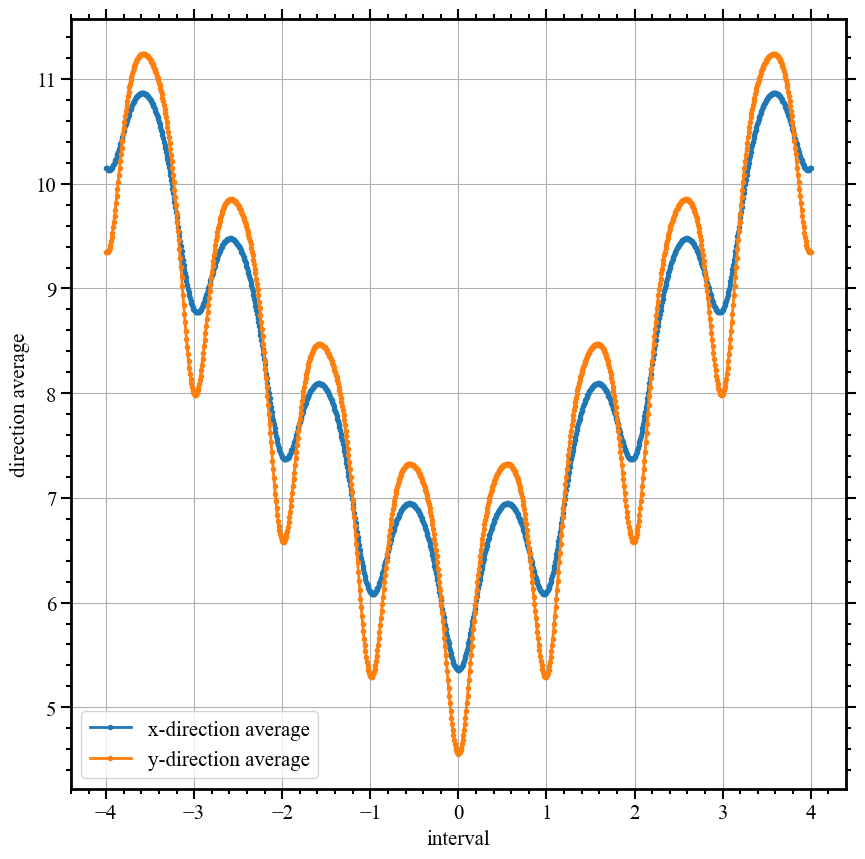

In [14]:
# numpy.mean(a, axis)
# axis = 0 --> x축, axis = 1 --> y축
x_average = np.mean(Z, axis=0)
y_average = np.mean(Z, axis=1)

fig, ax = plt.subplots()
ax.plot(x, x_average,'.-', label='x-direction average')
ax.plot(y, y_average,'.-', label='y-direction average')
plt.grid()
plt.xlabel('interval')
plt.ylabel('direction average')
ax.legend()
